In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from search_model import SearchModel
from gradient_model import GradientModel
from hybrid_model import HybridModel

from sklearn.datasets import load_diabetes

In [38]:
data = load_diabetes()
X, y = data.data, data.target
y = np.expand_dims(y, 1)
X = np.float32(X)
y = np.float32(y)
X.shape, y.shape

((442, 10), (442, 1))

In [39]:
input_size = X.shape[1]
num_iterations = 30
X = torch.Tensor(X)
y = torch.tensor(y)

In [40]:
# num_examples = 1000
# num_iterations = 100
# input_size = 10

# X = torch.randn(num_examples, input_size)
# y = X.su
# 
# m(dim=1, keepdim=True)

In [41]:
search_model = SearchModel(input_size=input_size, hidden_sizes=[5, 4], output_size=1,
                weight_range=[-5, 5], bias_range=[-5, 5],
                weight_range_size=100, bias_range_size=100)


loss = search_model.evaluate(X, y)
print(f"Initial loss for search model before searching: {loss}")

Initial loss for search model before searching: 19075.111328125


In [42]:
history_search = search_model.search(X, y, num_iterations)

Iteration 1: Loss improved from 19075.111328 to 3684.360596
Iteration 2: Loss improved from 3684.360596 to 2863.365479
Iteration 3: Loss improved from 2863.365479 to 2792.904785
Iteration 4: Loss improved from 2792.904785 to 2760.169189
Iteration 5: Loss improved from 2760.169189 to 2743.111816
Iteration 6: Loss improved from 2743.111816 to 2726.680664
Iteration 7: Loss improved from 2726.680664 to 2715.324707
Iteration 8: Loss improved from 2715.324707 to 2703.413574
Iteration 9: Loss improved from 2703.413574 to 2696.755127
Iteration 10: Loss improved from 2696.755127 to 2688.410889
Iteration 11: Loss improved from 2688.410889 to 2681.363037
Iteration 12: Loss improved from 2681.363037 to 2673.278564
Iteration 13: Loss improved from 2673.278564 to 2665.450684
Iteration 14: Loss improved from 2665.450684 to 2659.127441
Iteration 15: Loss improved from 2659.127441 to 2653.350098
Iteration 16: Loss improved from 2653.350098 to 2649.497803
Iteration 17: Loss improved from 2649.497803 to 

In [55]:
loss = search_model.evaluate(X, y)
print(f"Final loss for search model after searching: {loss}")

Final loss for search model after searching: 2629.17333984375


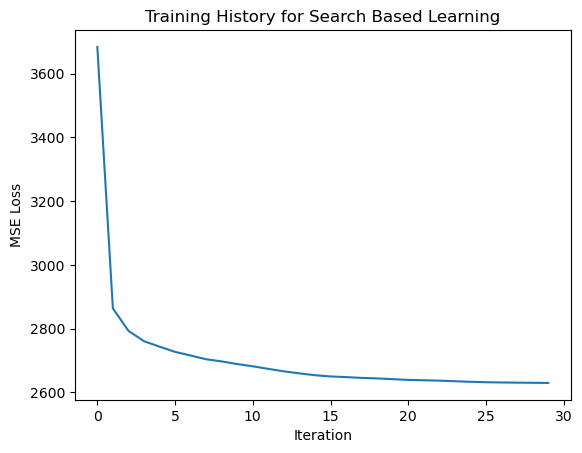

In [44]:
plt.plot(history_search)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training History for Search Based Learning')
plt.show()

In [45]:
gradient_model = GradientModel(input_size=input_size, hidden_sizes=[5, 4], output_size=1,
                weight_range=[-5, 5], bias_range=[-5, 5])

loss = gradient_model.evaluate(X, y)
print(f"Initial loss for gradient model before searching: {loss}")

Initial loss for gradient model before searching: 6952.14892578125


In [46]:
learning_rate = 1e-1
history_grad = gradient_model.train_model(X, y, num_iterations, learning_rate)

Epoch: 1, Loss: 6952.1489
Epoch: 2, Loss: 5559.2129
Epoch: 3, Loss: 4887.2290
Epoch: 4, Loss: 4984.9224
Epoch: 5, Loss: 5221.5205
Epoch: 6, Loss: 5099.9570
Epoch: 7, Loss: 4751.7573
Epoch: 8, Loss: 4423.6953
Epoch: 9, Loss: 4242.3301
Epoch: 10, Loss: 4202.9326
Epoch: 11, Loss: 4218.7842
Epoch: 12, Loss: 4205.9229
Epoch: 13, Loss: 4128.4917
Epoch: 14, Loss: 3997.3977
Epoch: 15, Loss: 3851.8308
Epoch: 16, Loss: 3730.8569
Epoch: 17, Loss: 3666.0410
Epoch: 18, Loss: 3654.7007
Epoch: 19, Loss: 3662.1631
Epoch: 20, Loss: 3648.3857
Epoch: 21, Loss: 3595.8445
Epoch: 22, Loss: 3517.5833
Epoch: 23, Loss: 3442.4648
Epoch: 24, Loss: 3394.4265
Epoch: 25, Loss: 3376.6970
Epoch: 26, Loss: 3373.0005
Epoch: 27, Loss: 3361.6567
Epoch: 28, Loss: 3331.2698
Epoch: 29, Loss: 3285.1597
Epoch: 30, Loss: 3237.5215


/Users/timii/miniforge3/envs/ai/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [47]:
loss = gradient_model.evaluate(X, y)
print(f"Final loss for gradient model after gradient based training: {loss}")

Final loss for gradient model after gradient based training: 3203.11474609375


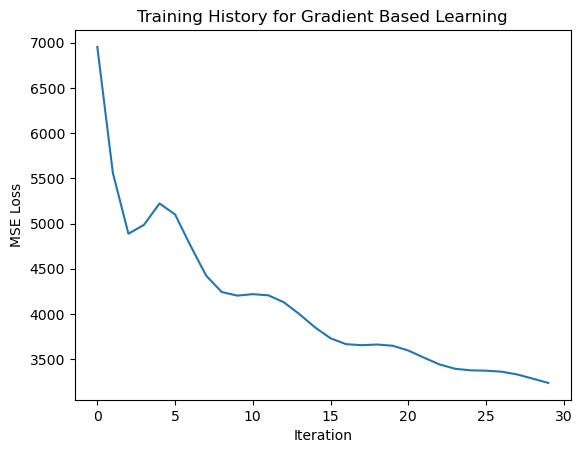

In [48]:
plt.plot(history_grad)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title(f'Training History for Gradient Based Learning')
plt.show()

In [49]:
hybrid_model = HybridModel(input_size=input_size, hidden_sizes=[5, 4], output_size=1,
                weight_range=[-5, 5], bias_range=[-5, 5],
                weight_range_size=100, bias_range_size=100)

loss = hybrid_model.evaluate(X, y)
print(f"Initial loss for hybrid model before training: {loss}")

Initial loss for hybrid model before training: 43629.0


In [50]:
learning_rate = 1e-1
history_hybrid = hybrid_model.search_and_train(X, y, num_iterations, learning_rate, num_iterations)

Searching for optimal parameters
Iteration 1: Loss improved from 43629.000000 to 3214.207520
Iteration 2: Loss improved from 3214.207520 to 2876.734375
Iteration 3: Loss improved from 2876.734375 to 2869.176270
Iteration 4: Loss improved from 2869.176270 to 2866.032715
Iteration 5: Loss improved from 2866.032715 to 2863.859131
Iteration 6: Loss improved from 2863.859131 to 2852.401367
Iteration 7: Loss improved from 2852.401367 to 2849.916260
Iteration 8: Loss improved from 2849.916260 to 2849.310059
Iteration 9: Loss improved from 2849.310059 to 2848.638672
Iteration 10: Loss improved from 2848.638672 to 2848.081055
Iteration 11: Loss improved from 2848.081055 to 2847.641357
Iteration 12: Loss improved from 2847.641357 to 2847.235352
Iteration 13: Loss improved from 2847.235352 to 2846.821533
Iteration 14: Loss improved from 2846.821533 to 2846.405029
Iteration 15: Loss improved from 2846.405029 to 2846.198975
Iteration 16: Loss improved from 2846.198975 to 2846.101807
Iteration 17: L

In [51]:
loss = hybrid_model.evaluate(X, y)
print(f"Final loss for hybrid model after training: {loss}")

Final loss for hybrid model after training: 2855.36474609375


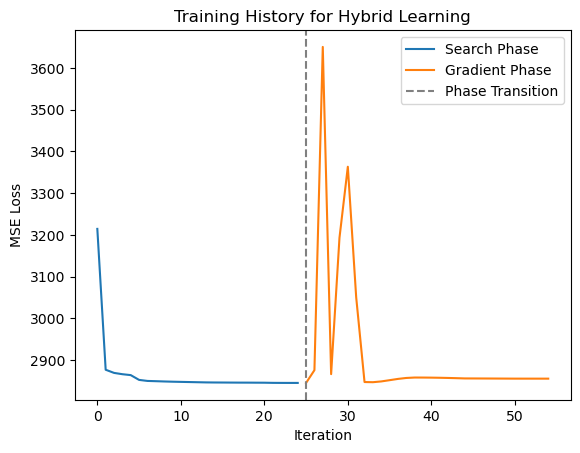

In [52]:
history_hybrid_search, history_hybrid_grad = history_hybrid
history_combined = np.concatenate(history_hybrid, axis=0)

search_length = len(history_hybrid_search)

plt.plot(history_hybrid_search, label='Search Phase')
plt.plot(np.arange(search_length, search_length + len(history_hybrid_grad)), 
         history_hybrid_grad, label='Gradient Phase')

plt.axvline(x=search_length, color='gray', linestyle='--', label='Phase Transition')

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training History for Hybrid Learning')

plt.legend()

plt.show()

In [53]:
search_model_loss = search_model.evaluate(X, y)
grad_model_loss = gradient_model.evaluate(X, y)
hybrid_model_loss = hybrid_model.evaluate(X, y)

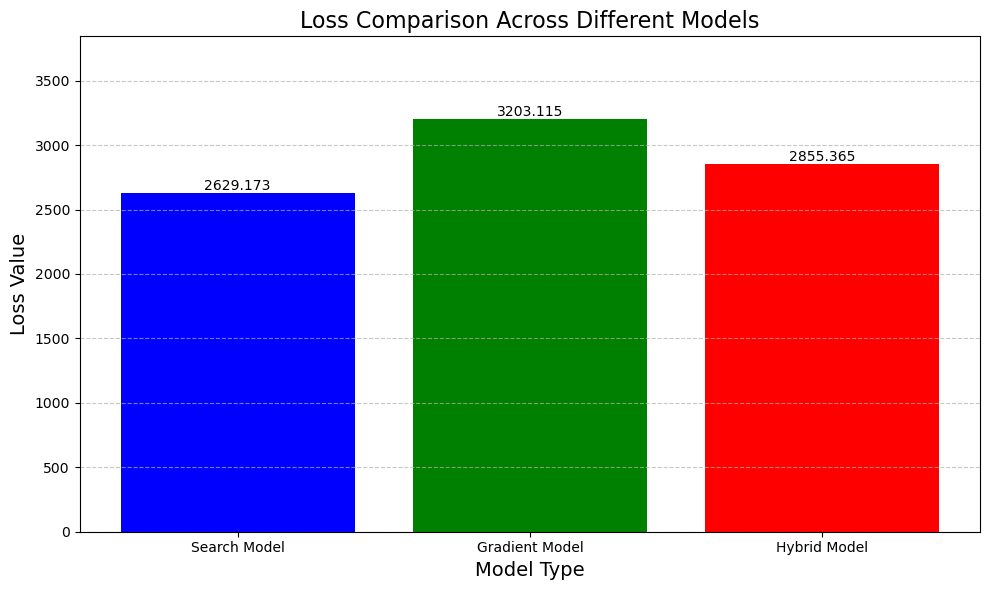

In [54]:
loss_values = [search_model_loss, grad_model_loss, hybrid_model_loss]

models = ['Search Model', 'Gradient Model', 'Hybrid Model']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, loss_values, color=['blue', 'green', 'red'])

plt.title('Loss Comparison Across Different Models', fontsize=16)
plt.xlabel('Model Type', fontsize=14)
plt.ylabel('Loss Value', fontsize=14)
plt.ylim(0, max(loss_values) * 1.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

